# Rocket alarms Israel (20 May 2021 - 4 April 2024)

#### Data downloaded from: https://github.com/ElijahSum/israel_hamas_conflict_data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Tori\Downloads\archive (2)\air_alarms_bombardments.csv")

In [3]:
df.head()

,Unnamed: 0,alarm_date,alarm_time,region,place,attack_number
0,0,2021-05-20,18:00:37,Gaza Envelope,Mefalsim,1
1,1,2021-05-20,18:00:37,Gaza Envelope,Nir Am Shooting Range,1
2,2,2021-05-20,18:00:37,Gaza Envelope,Sderot,1
3,3,2021-05-20,18:00:37,Gaza Envelope,Ibim,1
4,4,2021-05-20,18:00:37,Gaza Envelope,Nir Am,1


In [4]:
df.isnull().sum()

Unnamed: 0       0
alarm_date       0
alarm_time       0
region           0
place            0
attack_number    0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
print('Total number of alarms:', len(df))

Total number of alarms: 16271


In [7]:

israel_count = df.groupby('alarm_date').size().reset_index(name='counts')
print('Number of days with alarms in Israel:',len(israel_count))

Number of days with alarms in Israel: 234


In [8]:
top_alarm_dates = df.value_counts('alarm_date').head(10).reset_index()

In [9]:
top_alarm_dates.columns = ['alarm_date', 'counts']
top_alarm_dates

,alarm_date,counts
0,2023-10-07,4351
1,2023-10-11,1044
2,2022-08-07,454
3,2023-10-09,356
4,2023-05-10,318
5,2022-08-06,307
6,2023-05-13,266
7,2023-10-10,257
8,2023-10-17,252
9,2023-10-13,230


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16271 entries, 0 to 16270
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     16271 non-null  int64 
 1   alarm_date     16271 non-null  object
 2   alarm_time     16271 non-null  object
 3   region         16271 non-null  object
 4   place          16271 non-null  object
 5   attack_number  16271 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 762.8+ KB


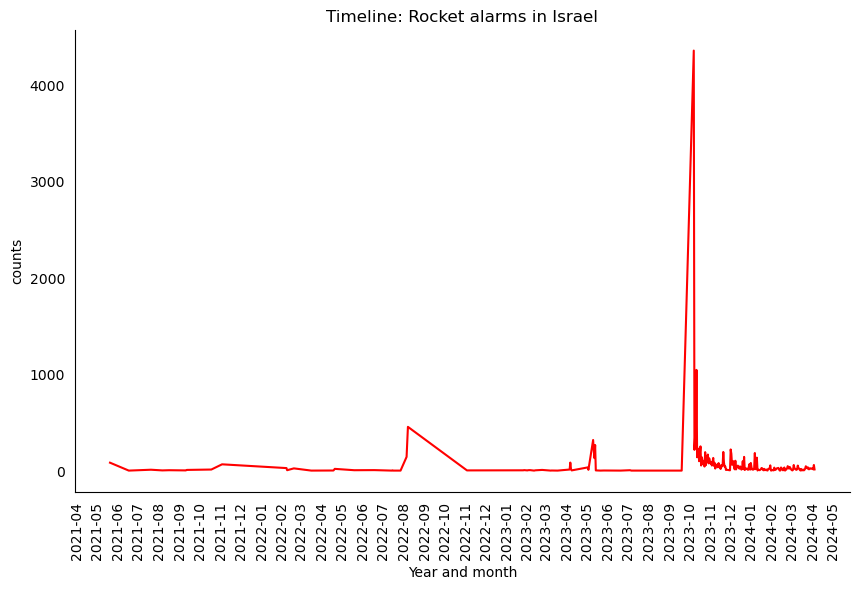

In [11]:
import matplotlib.dates as mdates

df['alarm_date'] = pd.to_datetime(df['alarm_date'])


data_viz_dates = df.groupby(['alarm_date']).size().reset_index(name='counts')

plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=data_viz_dates, x='alarm_date', y='counts', color = 'red')

# show only one tick per month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.tick_params(axis='y', which='both', left=False, right=False)


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title('Timeline: Rocket alarms in Israel')
plt.xlabel('Year and month')

plt.xticks(rotation=90)


plt.show()


In [12]:
print('from:',min(df['alarm_date']))
print('to:', max(df['alarm_date']))

from: 2021-05-20 00:00:00
to: 2024-04-04 00:00:00


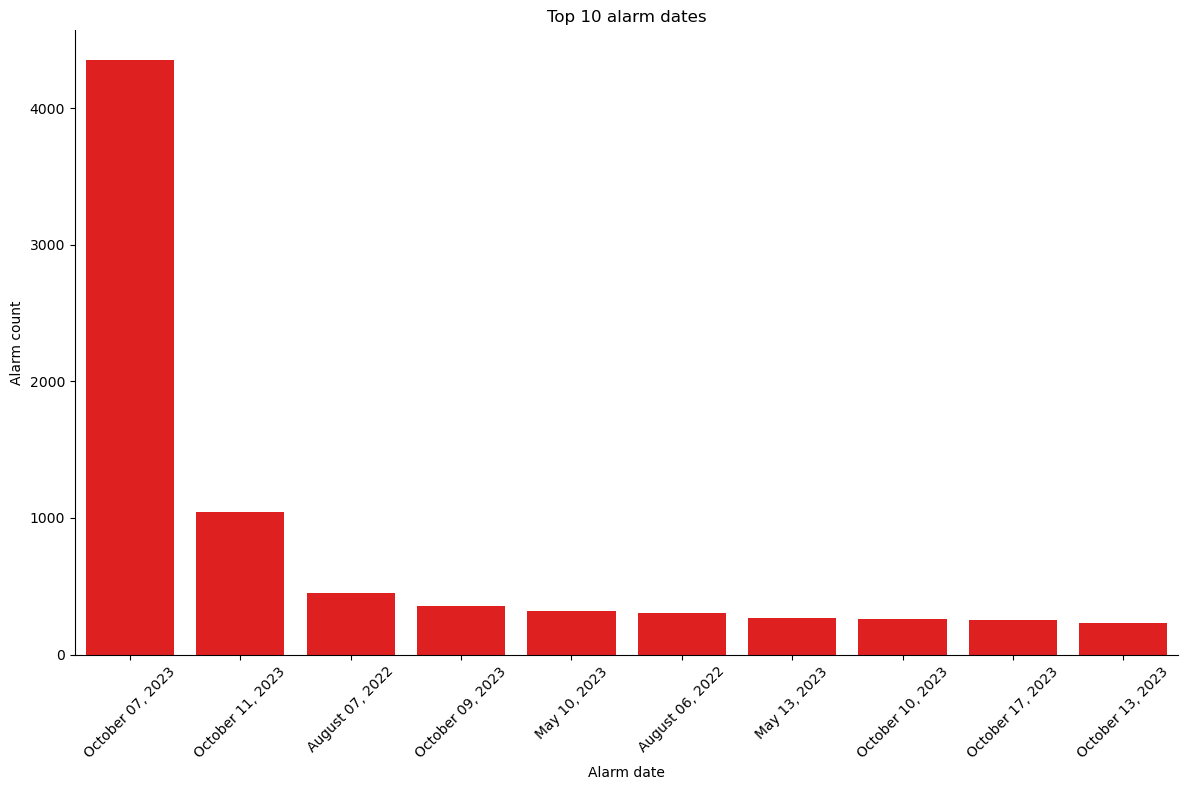

In [13]:
top_alarm_dates['alarm_date'] = pd.to_datetime(top_alarm_dates['alarm_date'])


top_alarm_dates['alarm_date'] = top_alarm_dates['alarm_date'].dt.strftime('%B %d, %Y')

plt.figure(figsize=(12, 8))
ax = sns.barplot(data=top_alarm_dates, x='alarm_date', y='counts', color='red')
plt.xlabel('Alarm date')
plt.ylabel('Alarm count')
plt.title('Top 10 alarm dates')
plt.xticks(rotation=45)


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
plt.show()

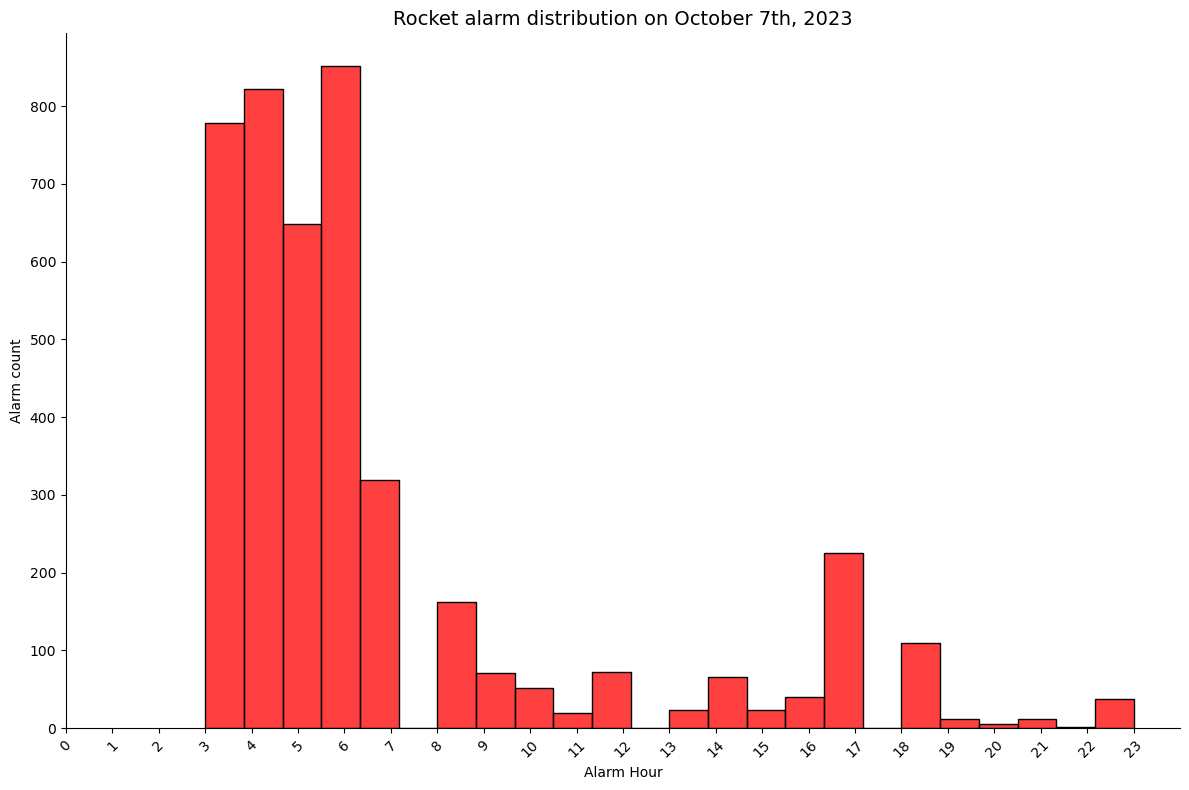

In [14]:
# Ensure 'alarm_date' is in datetime format
df['alarm_date'] = pd.to_datetime(df['alarm_date'])

# Filter the dataframe for October 7th, 2023
oct_7_alarms = df[df['alarm_date'] == '2023-10-07'].copy()

# Ensure 'alarm_time' is in datetime format
oct_7_alarms['alarm_time'] = pd.to_datetime(oct_7_alarms['alarm_time'], format='%H:%M:%S', errors='coerce')

# Drop rows where 'alarm_time' could not be converted
#oct_7_alarms = oct_7_alarms.dropna(subset=['alarm_time'])

# Extract only the hour component
oct_7_alarms['alarm_hour'] = oct_7_alarms['alarm_time'].dt.hour

# Plotting the distribution of alarm times
plt.figure(figsize=(12, 8))
ax = sns.histplot(oct_7_alarms['alarm_hour'], bins=24,  color='r')
plt.xlabel('Alarm Hour')
plt.ylabel('Alarm count')
plt.title('Rocket alarm distribution on October 7th, 2023', size = 14)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xticks(range(0, 24))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
df['alarm_date'] 

0       2021-05-20
1       2021-05-20
2       2021-05-20
3       2021-05-20
4       2021-05-20
           ...    
16266   2024-04-04
16267   2024-04-04
16268   2024-04-04
16269   2024-04-04
16270   2024-04-04
Name: alarm_date, Length: 16271, dtype: datetime64[ns]

In [16]:
df['alarm_hour_minute'] = pd.to_datetime(df['alarm_time'], format='%H:%M:%S').dt.strftime('%H:%M')

df['alarm_time'] = pd.to_datetime(df['alarm_hour_minute'])

# Combine 'alarm_date' and 'alarm_time' into one column
df['alarm_datetime'] = pd.to_datetime(df['alarm_date'].astype(str) + ' ' + df['alarm_hour_minute'].astype(str))

top_alarm_datetimes = df['alarm_datetime'].value_counts().head(10).reset_index()

top_alarm_datetimes.columns = ['alarm_datetime', 'counts']

print(top_alarm_datetimes)


       alarm_datetime  counts
0 2023-10-11 15:35:00     431
1 2023-10-11 15:21:00     211
2 2023-11-20 16:03:00     138
3 2023-10-07 17:00:00     102
4 2023-10-11 15:20:00      87
5 2023-10-24 14:01:00      85
6 2023-10-07 03:31:00      85
7 2023-10-07 03:33:00      79
8 2024-01-06 06:07:00      77
9 2023-10-07 04:33:00      75


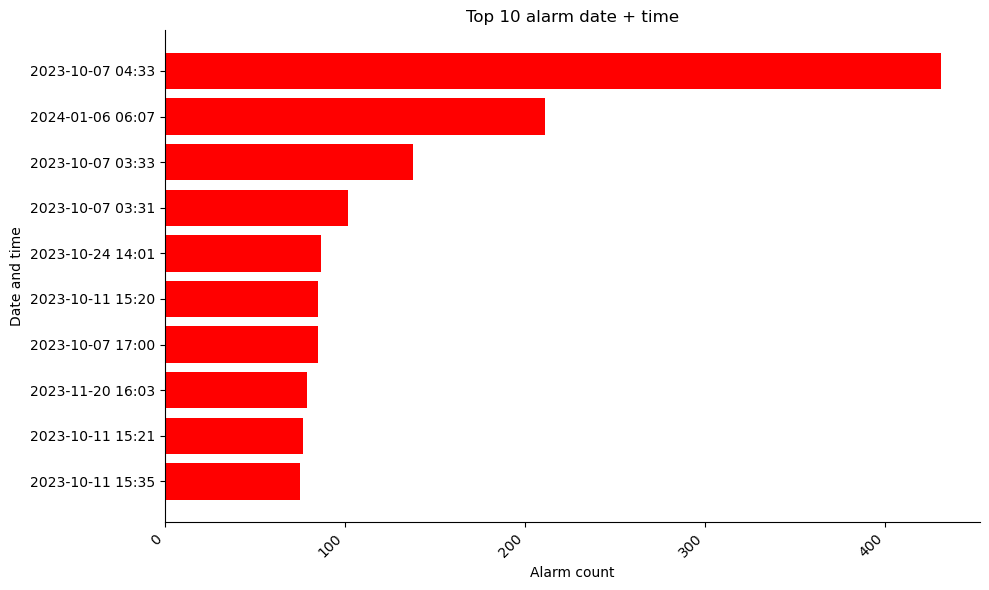

In [17]:
plt.figure(figsize=(10, 6))
plt.barh(top_alarm_datetimes['alarm_datetime'].dt.strftime('%Y-%m-%d %H:%M'), top_alarm_datetimes['counts'].sort_values(ascending = True), color='r')
plt.xlabel('Alarm count')
plt.ylabel('Date and time')
plt.title('Top 10 alarm date + time')
plt.xticks(rotation=45, ha='right')

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
plt.show()

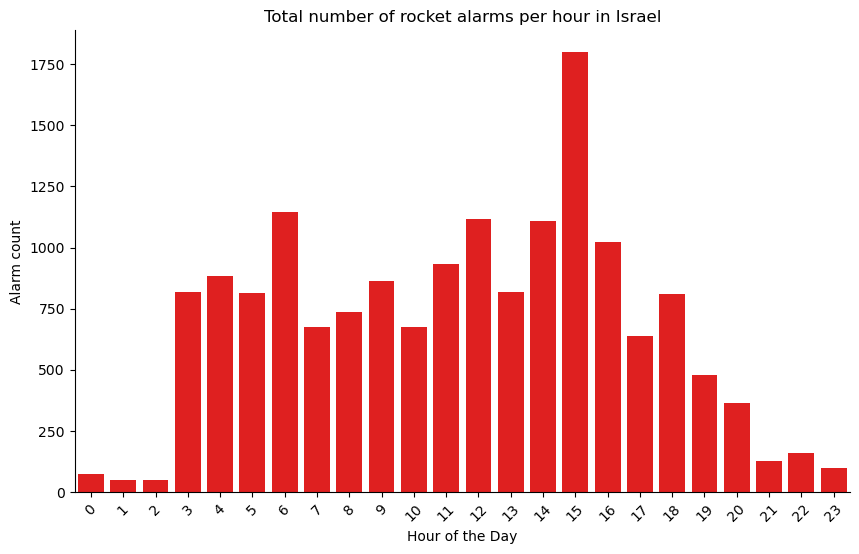

In [18]:
df['hour'] = pd.to_datetime(df['alarm_hour_minute'], format='%H:%M').dt.hour

hour_counts = df['hour'].value_counts().sort_index()


plt.figure(figsize=(10, 6))
ax = sns.barplot(x=hour_counts.index, y=hour_counts.values, color='red')
plt.title('Total number of rocket alarms per hour in Israel')
plt.xlabel('Hour of the Day')
plt.ylabel('Alarm count')


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation=45)

plt.show()


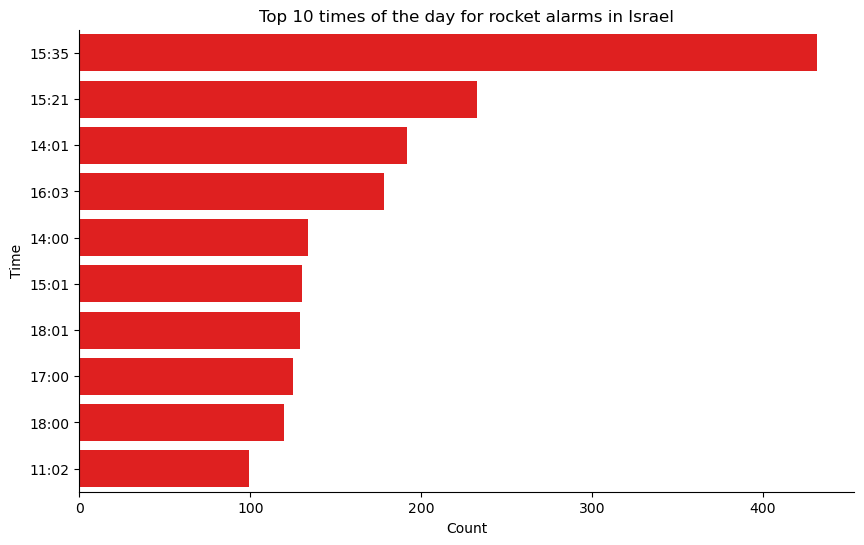

In [19]:
#df['alarm_hour_minute'] = pd.to_datetime(df['alarm_time'], format='%H:%M:%S').dt.strftime('%H:%M')


hour_minute_top = df['alarm_hour_minute'].value_counts().head(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=hour_minute_top.values, y=hour_minute_top.index, color='r')
plt.title('Top 10 times of the day for rocket alarms in Israel')
plt.xlabel('Count')
plt.ylabel('Time')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

In [20]:
df['region'] = df['region'].replace({'Dan': 'Tel-Aviv Area'})
df.value_counts('region')

region
Gaza Envelope         4804
Confrontation Line    2379
Lakhish               2000
Western Lakhish       1300
Shfela (Lowlands)     1286
Tel-Aviv Area         1264
Western Negev          656
Upper Galilee          506
Central Negev          326
Shfelat Yehuda         306
Southern Golan         180
HaAmakim               176
Southern Negev         147
Yarkon                 139
Northern Golan         136
Jerusalem              114
Sharon                 105
Judea                  101
Lower Galilee           85
Beit Sha'an Valley      61
Wadi Ara                49
HaMifratz               34
Eilat                   32
Samaria                 27
Bika'a                  25
Arabah                  11
Menashe                 10
Center Galilee           8
HaCarmel                 4
dtype: int64

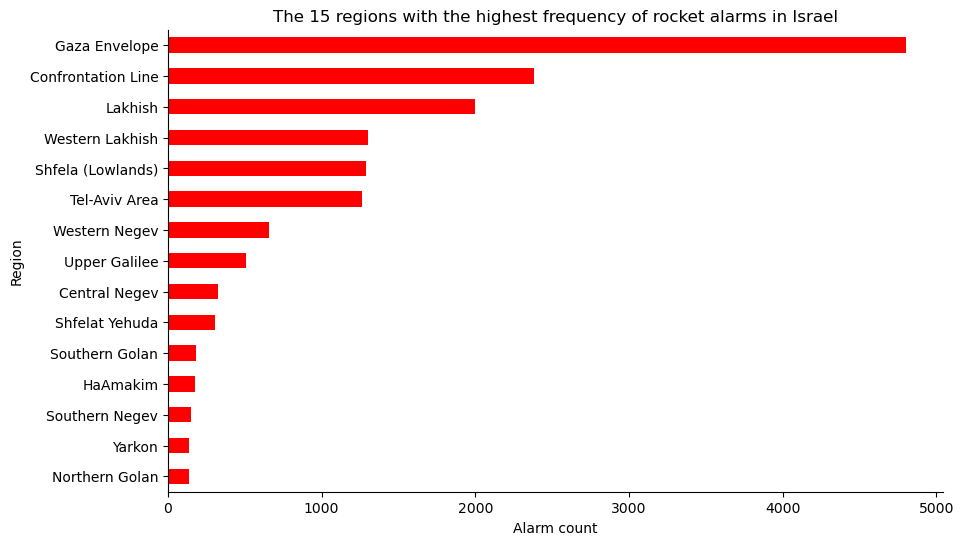

In [21]:
top_regions = df.value_counts('region').head(15)
top_regions = top_regions.sort_values(ascending=True)
plt.figure(figsize=(10, 6))
ax = top_regions.plot(kind='barh', color = 'red')
plt.title('The 15 regions with the highest frequency of rocket alarms in Israel')
plt.xlabel('Alarm count')
plt.ylabel('Region')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

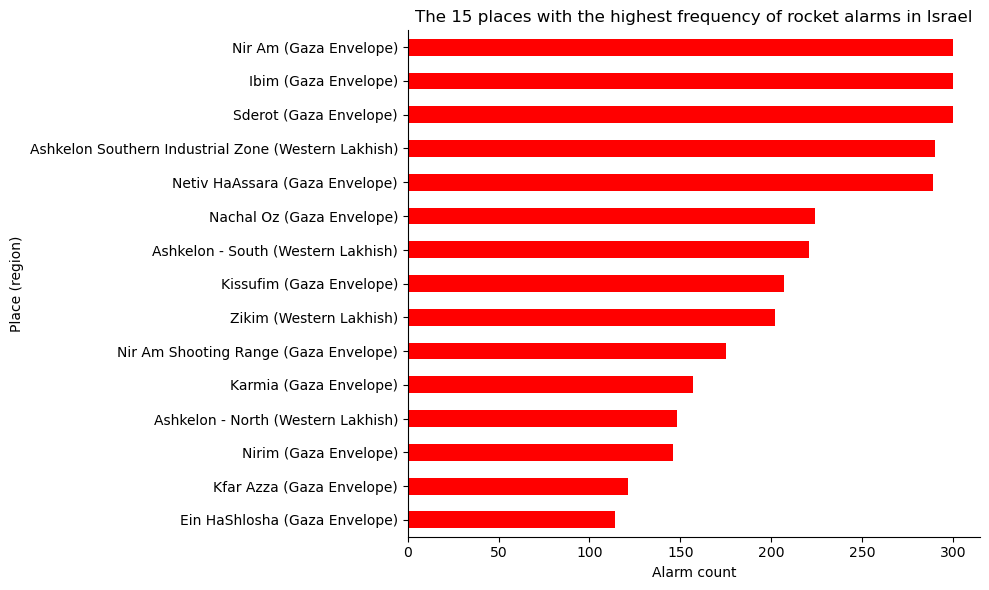

In [22]:

top_places_counts = df['place'].value_counts().head(15).sort_values(ascending=True)

# Create a dataframe with place and region information
top_places_info = df[df['place'].isin(top_places_counts.index)].drop_duplicates(subset=['place'])
top_places_df = pd.DataFrame({'place': top_places_counts.index, 'alarm_count': top_places_counts.values}).merge(top_places_info, on='place')
top_places_df['place_region'] = top_places_df['place'] + ' (' + top_places_df['region'] + ')'


plt.figure(figsize=(10, 6))
ax = top_places_df.set_index('place_region')['alarm_count'].plot(kind='barh', color='red')
plt.title('The 15 places with the highest frequency of rocket alarms in Israel')
plt.xlabel('Alarm count')
plt.ylabel('Place (region)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
plt.show()

In [23]:
# Group by 'region' and 'alarm_date' and count occurrences
region_count = df.groupby(['region', 'alarm_date']).size().reset_index(name='counts')
top_10_region_count = region_count['region'].value_counts().reset_index().head(10)
top_10_region_count.columns = ['region', 'counts']
top_10_region_count = top_10_region_count.sort_values(by = 'counts')

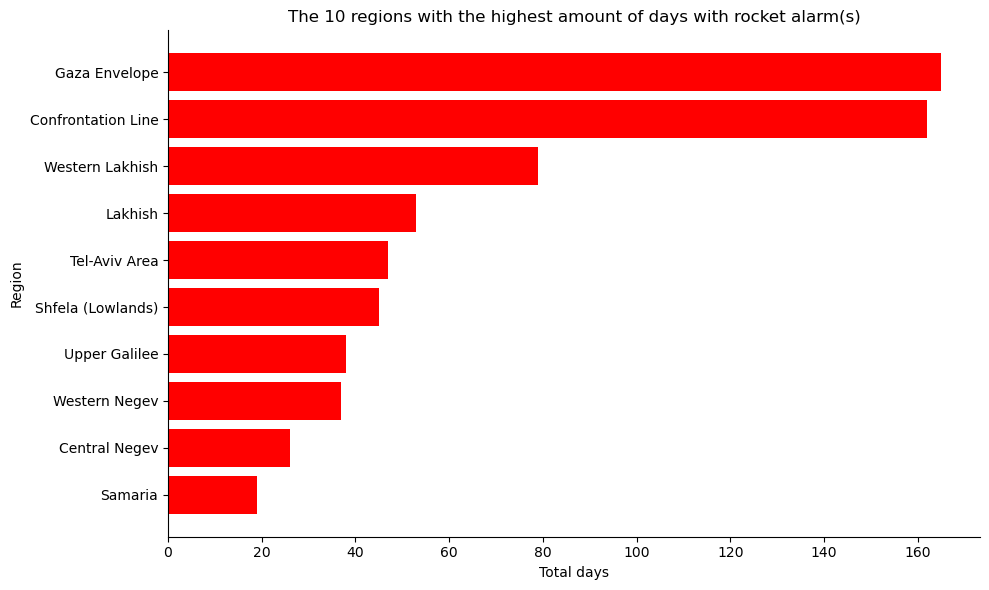

In [24]:
plt.figure(figsize=(10, 6))
plt.barh(top_10_region_count['region'], 
         top_10_region_count['counts'], 
         color='r')
plt.xlabel('Total days')
plt.ylabel('Region')
plt.title('The 10 regions with the highest amount of days with rocket alarm(s)')
   


ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

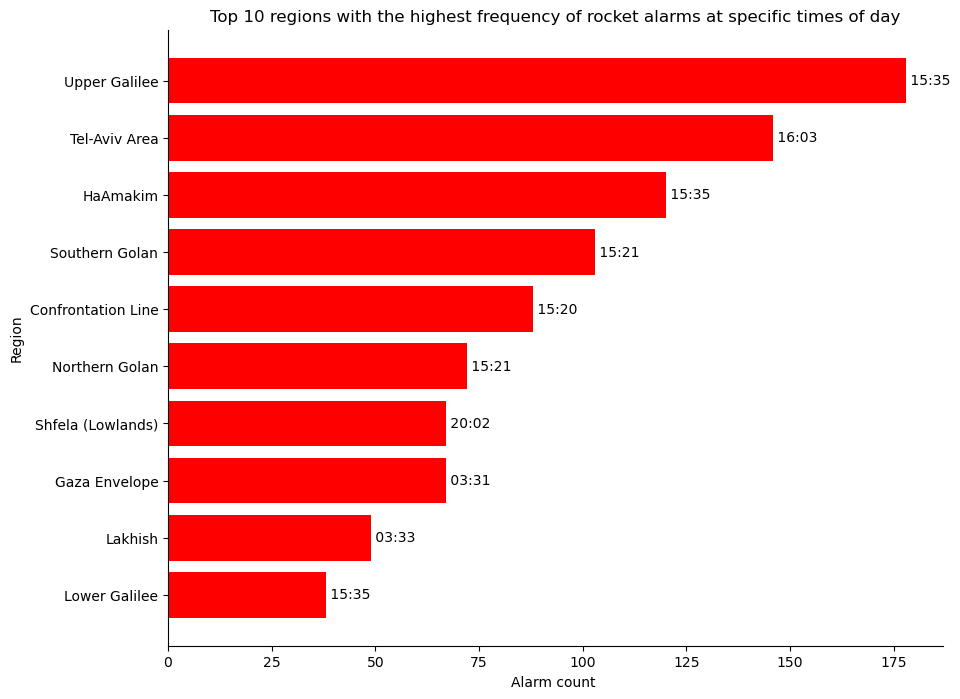

In [25]:
grouped_df = df.groupby(['region', 'alarm_hour_minute']).size().reset_index(name='counts')


top_minutes = grouped_df.loc[grouped_df.groupby('region')['counts'].idxmax()]


top_regions = top_minutes.groupby('region')['counts'].sum().nlargest(10).index
top_minutes = top_minutes[top_minutes['region'].isin(top_regions)]


top_minutes = top_minutes.sort_values(by='counts', ascending=True)


plt.figure(figsize=(10, 8))
bars = plt.barh(top_minutes['region'], top_minutes['counts'], color = 'red')

# Annotate time to bars 
for bar, minute in zip(bars, top_minutes['alarm_hour_minute']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f' {minute}', va='center')

plt.xlabel('Alarm count ')
plt.ylabel('Region')
plt.title('Top 10 regions with the highest frequency of rocket alarms at specific times of day')

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()


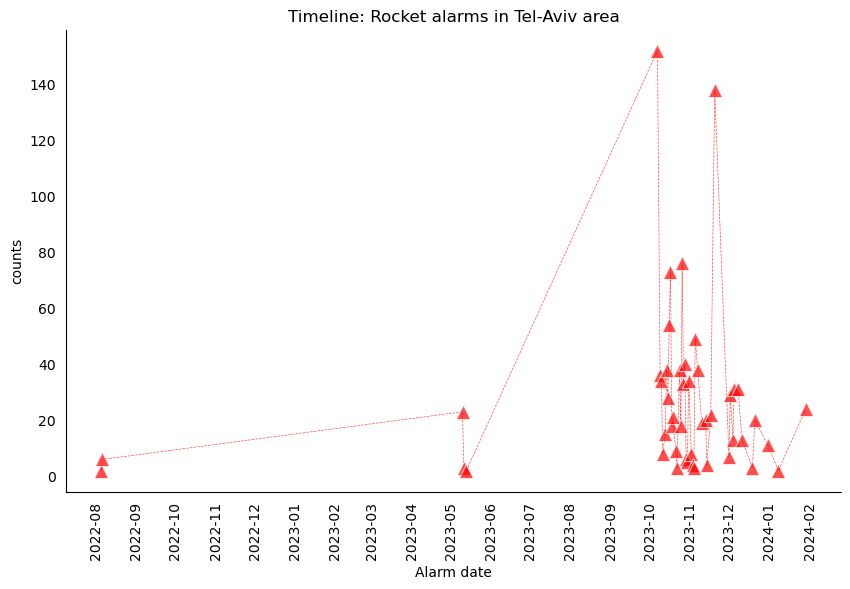

In [26]:
data_viz_dates_tel_aviv_area = df.groupby(['alarm_date', 'region']).size().reset_index(name='counts')
data_viz_dates_tel_aviv_area = data_viz_dates_tel_aviv_area[data_viz_dates_tel_aviv_area['region'] == 'Tel-Aviv Area']


plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=data_viz_dates_tel_aviv_area, x='alarm_date', y='counts', linestyle = '--',marker = '^', markersize = 10, lw = 0.5, color = 'red', alpha = 0.7)

# Show only one tick per month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))


plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.tick_params(axis='y', which='both', left=False, right=False)

plt.title('Timeline: Rocket alarms in Tel-Aviv area')
plt.xlabel('Alarm date')
plt.xticks(rotation = 90)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Show the plot
plt.show()


In [27]:
data_viz_dates_tel_aviv_area.sort_values(by = 'counts', ascending = False).head(10).reset_index()

,index,alarm_date,region,counts
0,138,2023-10-07,Tel-Aviv Area,152
1,462,2023-11-20,Tel-Aviv Area,138
2,309,2023-10-26,Tel-Aviv Area,76
3,245,2023-10-17,Tel-Aviv Area,73
4,238,2023-10-16,Tel-Aviv Area,54
5,391,2023-11-05,Tel-Aviv Area,49
6,326,2023-10-28,Tel-Aviv Area,40
7,221,2023-10-14,Tel-Aviv Area,38
8,295,2023-10-24,Tel-Aviv Area,38
9,404,2023-11-07,Tel-Aviv Area,38


In [28]:
tel_aviv_count = df['region'] == 'Tel-Aviv Area'
tel_aviv_count = df.loc[tel_aviv_count]
tel_aviv_count.value_counts('place').head(15).reset_index()

,place,0
0,Holon,65
1,Bat Yam,48
2,Rishon LeZion - West,47
3,Azor,45
4,Tel Aviv - South and Jaffa,42
5,Ramat Gan - West,41
6,Tel Aviv - East,37
7,Tel Aviv - City Center,35
8,Or Yehuda,35
9,Mikveh Israel,34


In [29]:
top_10_tlv= tel_aviv_count['alarm_hour_minute'].value_counts().head(10)

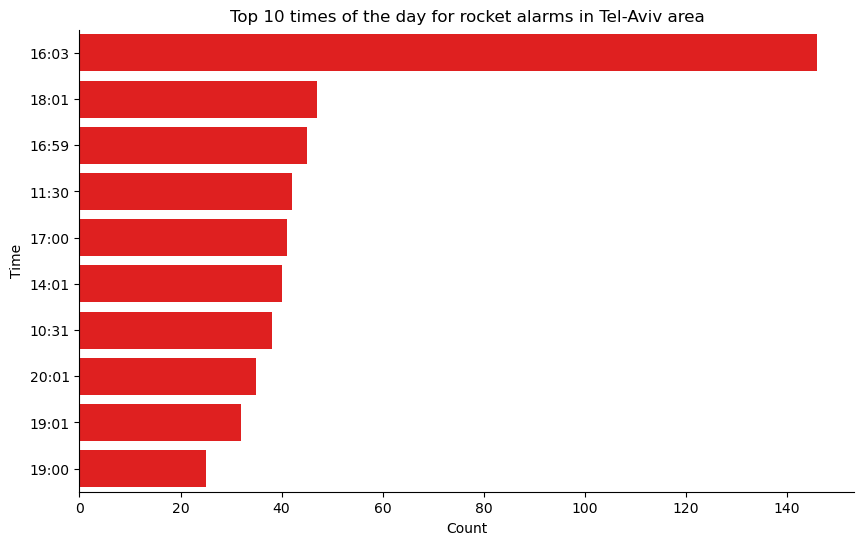

In [30]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_10_tlv.values, y=top_10_tlv.index, color = 'red')
plt.title('Top 10 times of the day for rocket alarms in Tel-Aviv area')
plt.xlabel('Count')
plt.ylabel('Time')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()